<a href="https://colab.research.google.com/github/armandossrecife/teste/blob/main/analise_dados_estados_brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instala dependências

- Geopandas (https://geopandas.org)

In [1]:
!pip install geopandas

# Importa bibliotecas

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Carrega os dados

In [72]:
df_pib_estados_2021 = pd.read_csv('pib_estados_2021.csv')
df_populacao_estados_2021 = pd.read_csv('populacao_estados_2021.csv')
df_dados_geograficos_estados = pd.read_csv('dados_geograficos_estados.csv')

# Funções básicas

In [48]:
def grafico_pizza_por_regiao(df_dados, agrupamento, coluna, titulo):
  # Group the data by region and sum the PIB
  agrupa_por_regiao = df_dados.groupby(agrupamento)[coluna].sum()

  # Create a pie chart
  plt.figure(figsize=(8, 8))
  plt.pie(agrupa_por_regiao, labels=agrupa_por_regiao.index, autopct='%1.1f%%', startangle=90)
  plt.title(titulo)
  _ = plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

def grafico_pizza_por_estado(df_dados, coluna, valor, titulo):
  sorted_data = df_dados.sort_values(valor)

  # Extract the sorted PIB values and state names
  pib_values_sorted = sorted_data[valor]
  estados_sorted = sorted_data[coluna]

  # Create a pie chart with sorted values
  plt.figure(figsize=(8, 8))
  plt.pie(pib_values_sorted, labels=estados_sorted, autopct='%1.1f%%', startangle=90)
  plt.title(titulo)
  _ = plt.axis('equal')
  plt.show()

def grafico_dispersao(df_dados, valor, agrupamento, x_label, y_label, titulo):
  df_dados.boxplot(column=valor, by=agrupamento)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  _ = plt.title(titulo)

# Informações básicas

## Dados referentes ao PIB dos estados em 2021

In [57]:
df_pib_estados_2021

,regiao,estado,pib
0,Norte,Acre,16476000000
1,Nordeste,Alagoas,63202000000
2,Norte,Amapá,18469000000
3,Norte,Amazonas,116019000000
4,Nordeste,Bahia,305321000000
5,Nordeste,Ceará,166915000000
6,Centro-Oeste,Distrito Federal,265847000000
7,Sudeste,Espírito Santo,138446000000
8,Centro-Oeste,Goiás,224126000000
9,Nordeste,Maranhão,106916000000


In [25]:
df_pib_estados_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   regiao  27 non-null     object
 1   estado  27 non-null     object
 2   pib     27 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 776.0+ bytes


In [6]:
df_pib_estados_2021.describe()

,pib
count,2.700000e+01
mean,2.818370e+11
std,4.627069e+11
min,1.602400e+10
25%,5.979650e+10
50%,1.384460e+11
75%,2.855840e+11
max,2.377639e+12


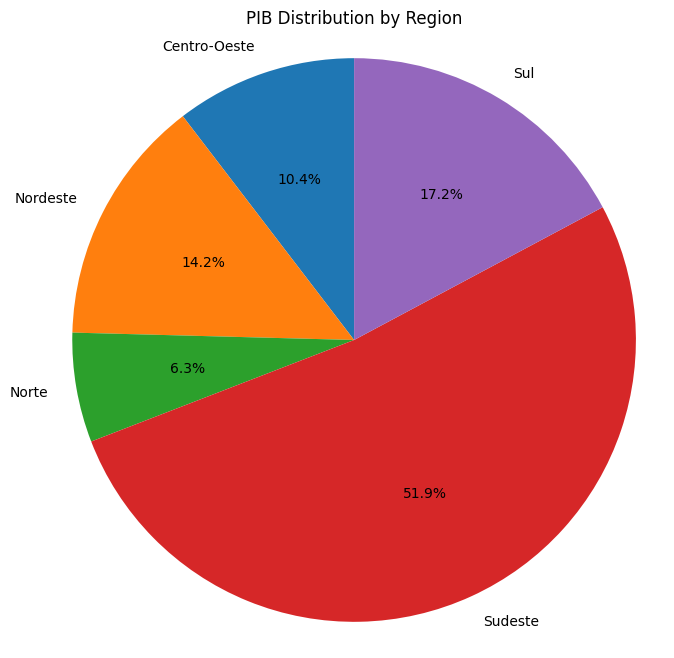

In [58]:
# @title PIB Distribution by Region
grafico_pizza_por_regiao(df_dados= df_pib_estados_2021,
                         agrupamento='regiao',
                         coluna='pib',
                         titulo='PIB Distribution by Region')

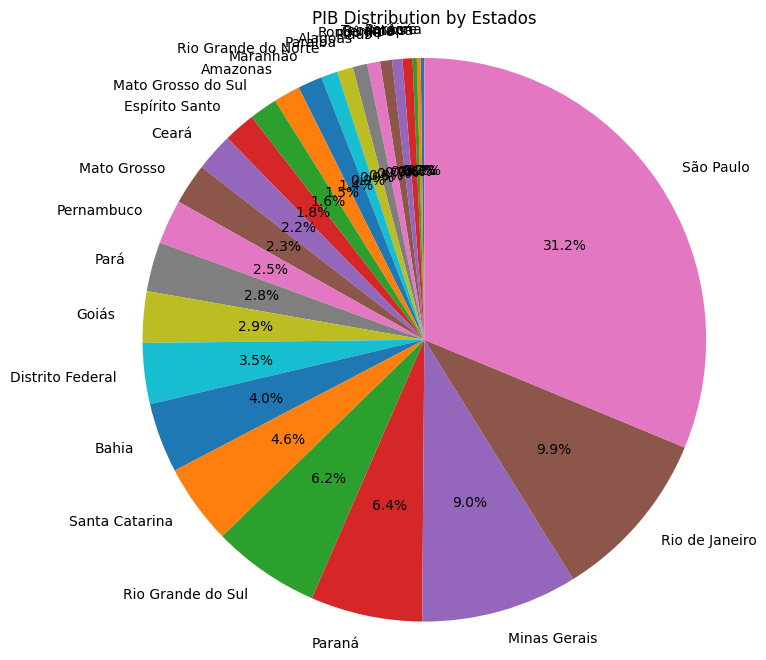

In [59]:
# @title PIB Distribution by Estados
grafico_pizza_por_estado(df_dados=df_pib_estados_2021,
                         coluna='estado',
                         valor='pib',
                         titulo='PIB Distribution by Estados')

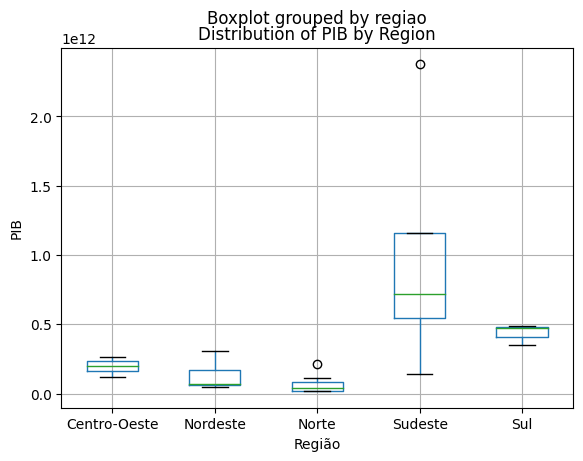

In [60]:
# @title Distribution of PIB by Region
grafico_dispersao(df_dados=df_pib_estados_2021,
                  valor='pib',
                  agrupamento='regiao',
                  x_label='Região',
                  y_label='PIB',
                  titulo='Distribution of PIB by Region')

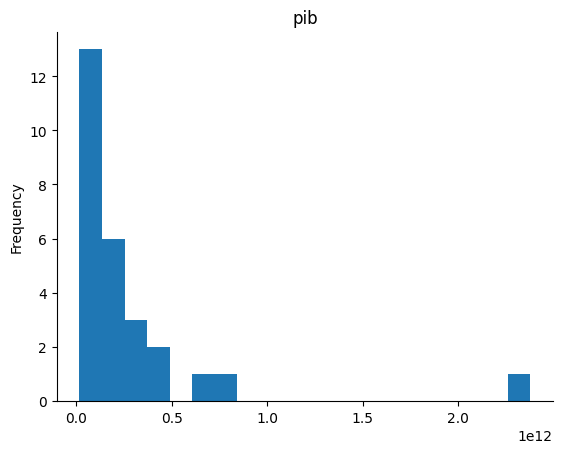

In [70]:
# @title Histograma do PIB por estados

df_pib_estados_2021['pib'].plot(kind='hist', bins=20, title='pib')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Dados referentes a população dos estados em 2021

In [33]:
df_populacao_estados_2021

,regiao,estado,populacao
0,Norte,AC,869265
1,Nordeste,AL,3351543
2,Norte,AM,4207714
3,Norte,AP,845731
4,Nordeste,BA,14930634
5,Nordeste,CE,9187103
6,Centro-Oeste,DF,3055149
7,Sudeste,ES,4018650
8,Centro-Oeste,GO,7113540
9,Nordeste,MA,7035055


In [61]:
df_populacao_estados_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   regiao     27 non-null     object
 1   estado     27 non-null     object
 2   populacao  27 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 776.0+ bytes


In [62]:
df_populacao_estados_2021.describe()

,populacao
count,2.700000e+01
mean,7.824376e+06
std,9.300103e+06
min,6.311810e+05
25%,2.852639e+06
50%,4.039277e+06
75%,9.401862e+06
max,4.628933e+07


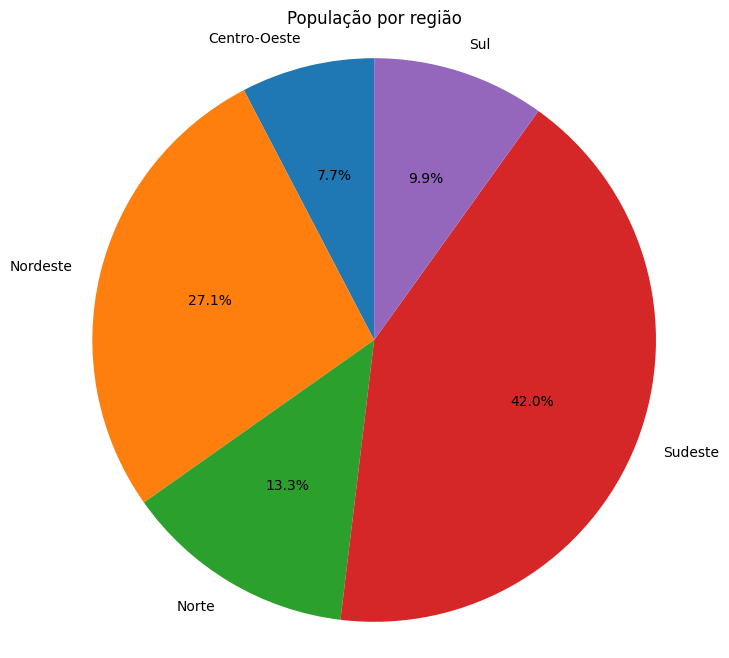

In [63]:
grafico_pizza_por_regiao(df_dados=df_populacao_estados_2021,
                         agrupamento='regiao',
                         coluna='populacao',
                         titulo='População por região')

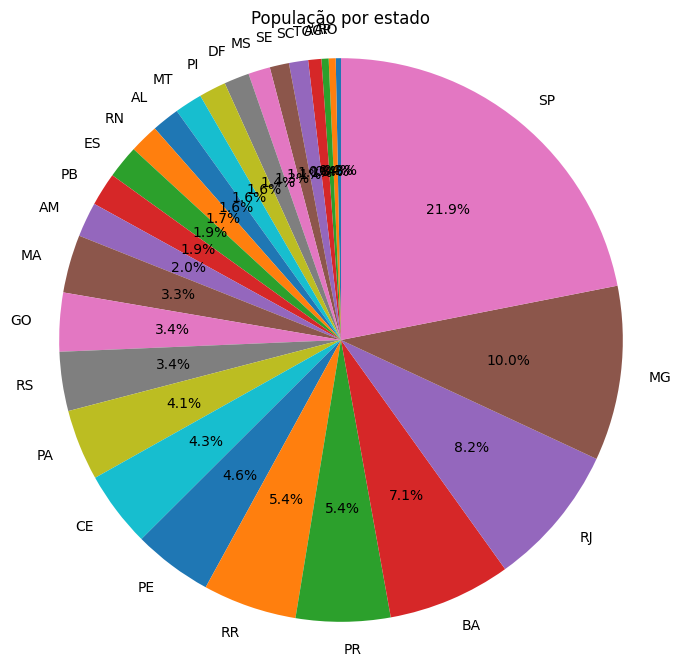

In [65]:
grafico_pizza_por_estado(df_dados=df_populacao_estados_2021,
                         coluna='estado',
                         valor='populacao',
                         titulo='População por estado')

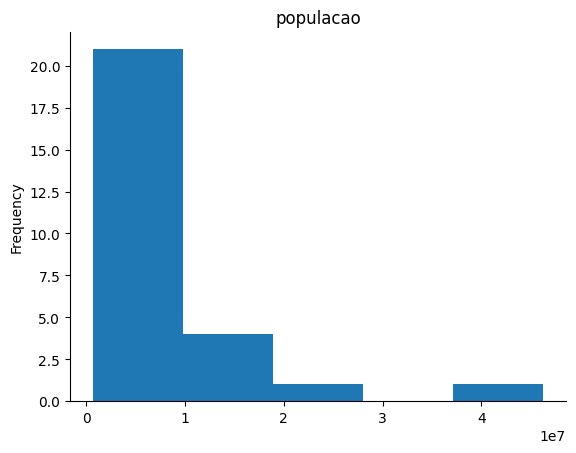

In [68]:
df_populacao_estados_2021['populacao'].plot(kind='hist', bins=5, title='populacao')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [83]:
print(df_dados_geograficos_estados['geometry'])

0     POLYGON ((-68.792817347 -10.999569268, -68.793...
1     POLYGON ((-56.7629192859999 -3.23220976999994,...
2     MULTIPOLYGON (((-48.9754773289999 -0.198339076...
3     MULTIPOLYGON (((-51.045611059 -0.0508778999999...
4     POLYGON ((-48.2482998469999 -13.1923920319999,...
5     MULTIPOLYGON (((-44.586795749 -2.2334114929999...
6     POLYGON ((-42.4703359879999 -3.48377360599994,...
7     POLYGON ((-37.871621831 -4.36640376799994, -37...
8     MULTIPOLYGON (((-35.1872782469999 -5.789866086...
9     MULTIPOLYGON (((-34.7957960539999 -7.175001689...
10    MULTIPOLYGON (((-35.0482289789999 -8.609356840...
11    MULTIPOLYGON (((-35.2869998479999 -9.144888067...
12    MULTIPOLYGON (((-37.01202668 -10.927842427, -3...
13    MULTIPOLYGON (((-39.264466424 -8.6141289849999...
14    POLYGON ((-42.5114783 -14.986273432, -42.50963...
15    MULTIPOLYGON (((-40.2788282349999 -20.33437388...
16    MULTIPOLYGON (((-42.0061195169999 -22.88562538...
17    MULTIPOLYGON (((-46.47312221 -22.704981248

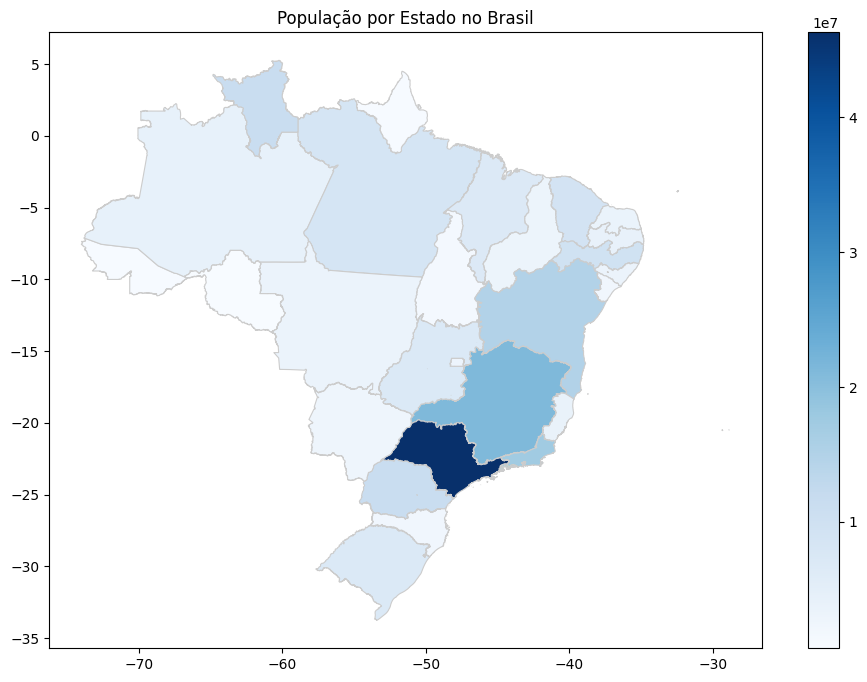

In [84]:
# Assuming 'geometry' column contains WKT or GeoJSON strings
gdf = gpd.GeoDataFrame(df_dados_geograficos_estados,
                       geometry=gpd.GeoSeries.from_wkt(df_dados_geograficos_estados['geometry']))

# Plotar o mapa com os dados
fig, ax = plt.subplots(figsize=(12, 8))

gdf.plot(column='populacao', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Configurar o título do mapa
ax.set_title('População por Estado no Brasil')

# Exibir o mapa
plt.show()